In [2]:
#Importando Librerias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
#leyendo el conjunto de mi dataset
df= pd.read_csv('Titanic-Dataset.csv')

In [6]:
#Pequeña muestra de mi conjunto de datos
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Forma del conjunto de mi dataset
df.shape

(891, 12)

In [10]:
# Imprimiendo los valores únicos de las columnas categóricas de tu DataFrame Titanic
print("Valores únicos en la columna 'Sex':", df['Sex'].unique())
print("Valores únicos en la columna 'Embarked':", df['Embarked'].unique())
print("Valores únicos en la columna 'Pclass':", df['Pclass'].unique())
print("Valores únicos en la columna 'Cabin':", df['Cabin'].unique())

# Estas son las variables categóricas de nuestro conjunto de datos

Valores únicos en la columna 'Sex': ['male' 'female']
Valores únicos en la columna 'Embarked': ['S' 'C' 'Q' nan]
Valores únicos en la columna 'Pclass': [3 1 2]
Valores únicos en la columna 'Cabin': [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C4

In [12]:
#Identificando valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# tratando valores nulos

# 1. Rellenar los valores nulos en 'Age' con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Rellenar los valores nulos en 'Embarked' con el valor más frecuente (modo)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verificamos que los valores nulos hayan sido tratados
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [22]:
#describiendo mi dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# Eliminamos columnas que no son relevantes para el modelo

# Eliminar columnas que no son necesarias para la predicción
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [28]:
# Mostrando como queda nustro dataframe sin las columnas
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
# convirtiendo variables categoricas en numericas y eliminando columnas irrelevantes

# Convertir 'Sex' en numérico: 0 para male, 1 para female
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convertir 'Embarked' en numérico: S = 0, C = 1, Q = 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Crear nueva columna 'Family_Size'
df['Family_Size'] = df['SibSp'] + df['Parch']

# Eliminar columnas innecesarias para la regresión (si aplica)
df = df.drop(['SibSp', 'Parch'], axis=1)

# Mostrar el dataset procesado
print(df.head())

   Survived  Pclass  Sex   Age     Fare  Embarked  Family_Size
0         0       3    0  22.0   7.2500         0            1
1         1       1    1  38.0  71.2833         1            1
2         1       3    1  26.0   7.9250         0            0
3         1       1    1  35.0  53.1000         0            1
4         0       3    0  35.0   8.0500         0            0


In [32]:
from sklearn.preprocessing import LabelEncoder

# Inicializamos el LabelEncoder
label_encoder = LabelEncoder()

# Codificamos las columnas categóricas
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male=0, female=1
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

# Comprobamos los datos codificados
print(df.head())

   Survived  Pclass  Sex   Age     Fare  Embarked  Family_Size
0         0       3    0  22.0   7.2500         0            1
1         1       1    1  38.0  71.2833         1            1
2         1       3    1  26.0   7.9250         0            0
3         1       1    1  35.0  53.1000         0            1
4         0       3    0  35.0   8.0500         0            0


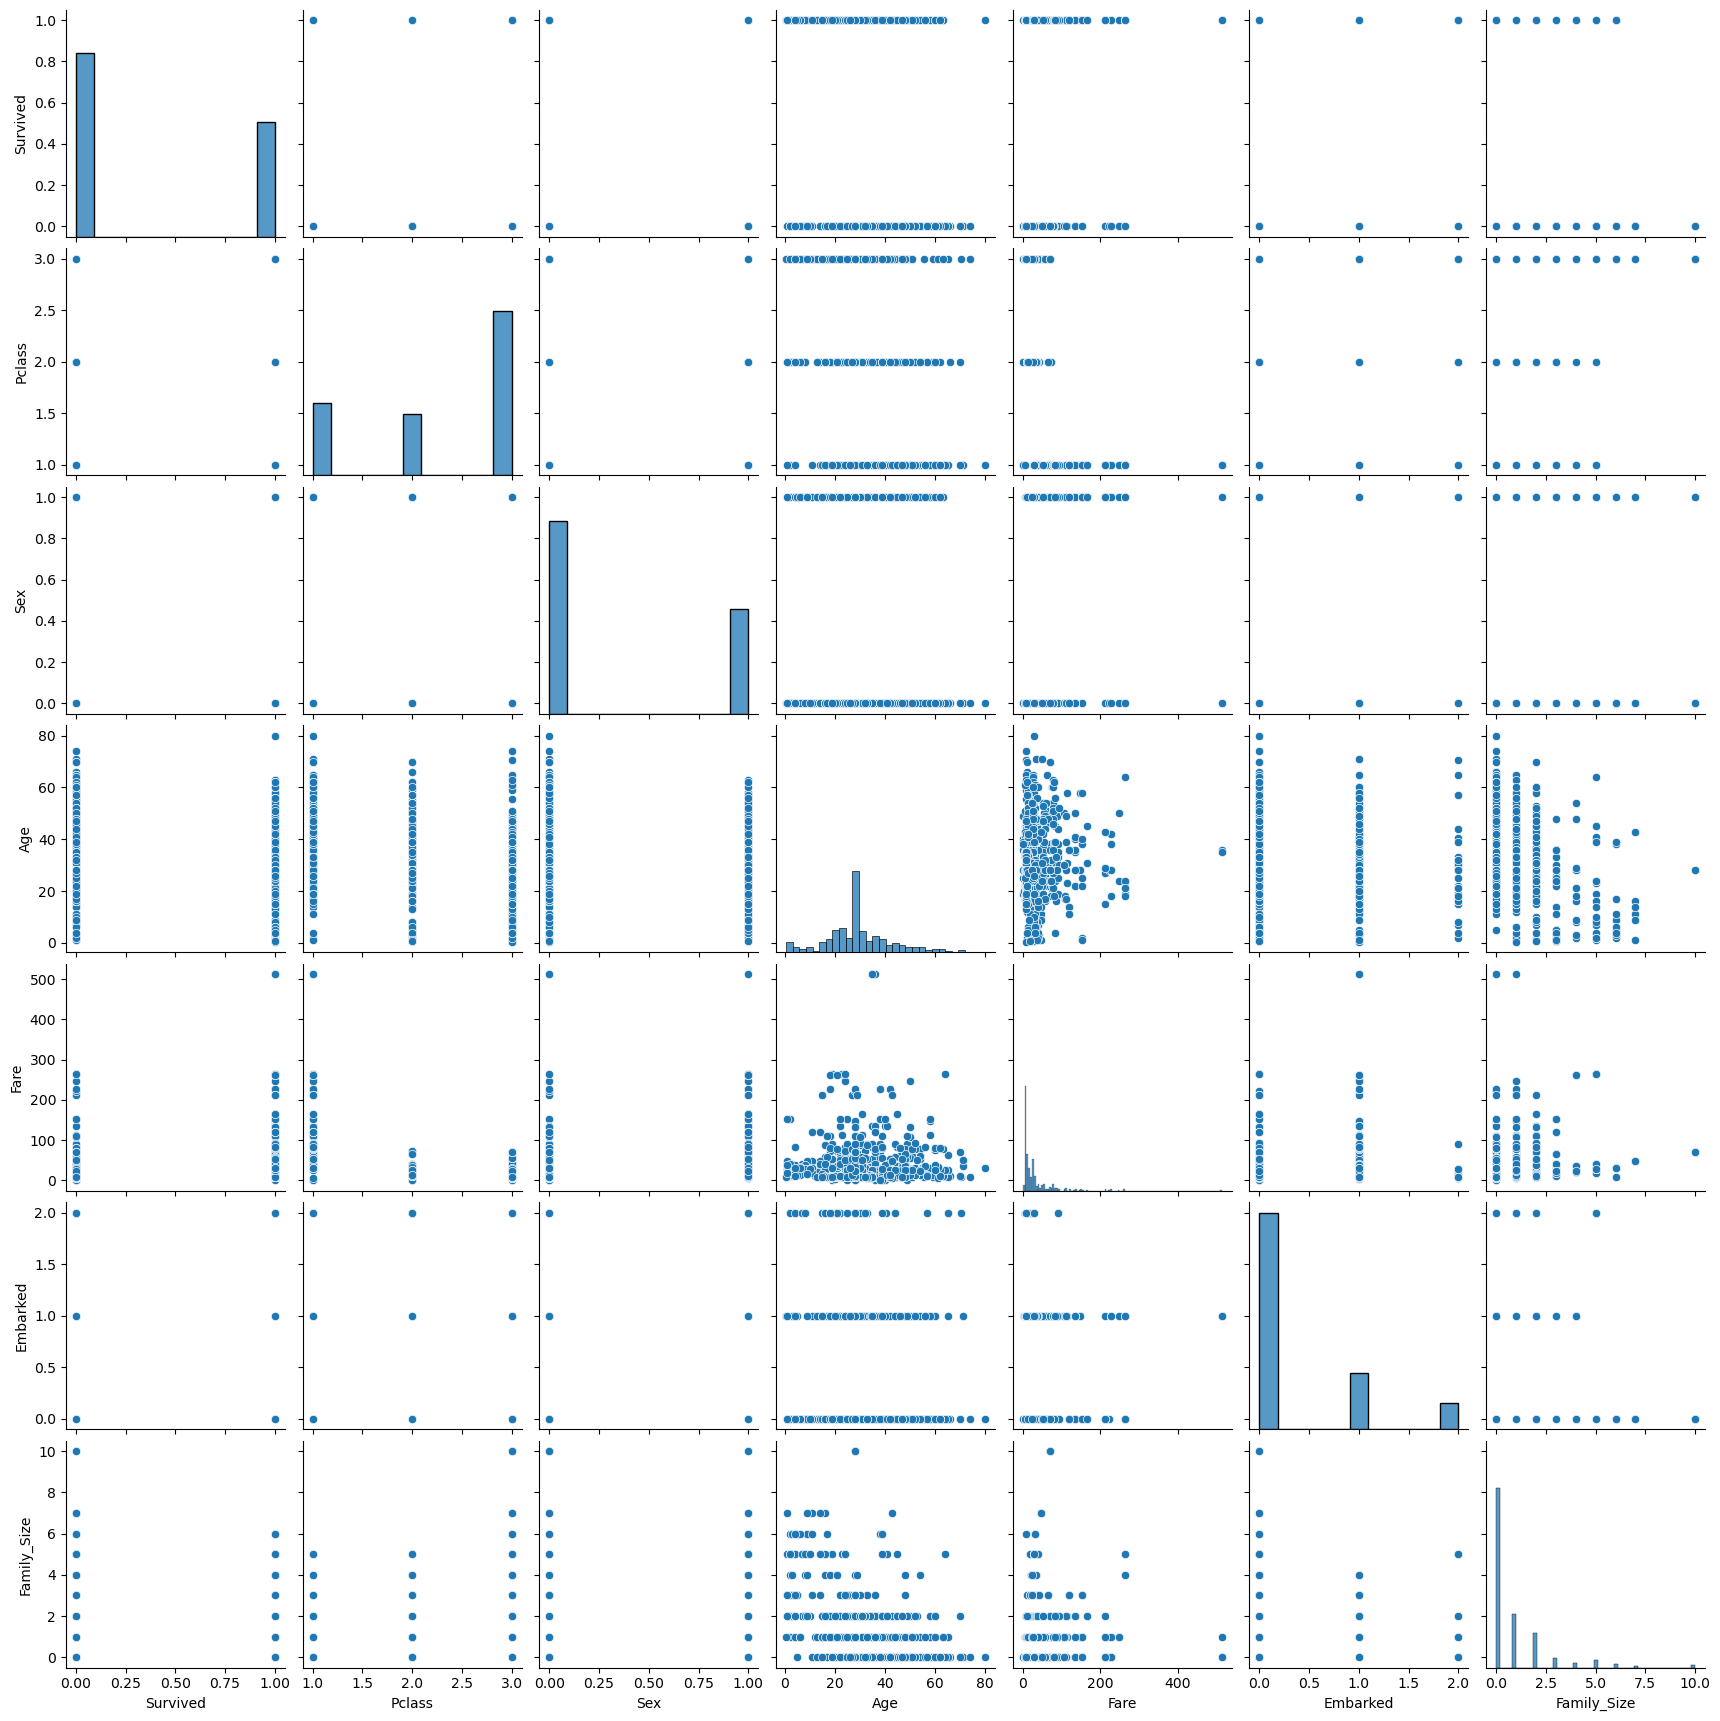

In [36]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Ignorar advertencias de tipo FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Generar gráfico de pares para explorar relaciones entre las variables numéricas
sns.pairplot(df, diag_kind='hist')

# Mostrar el gráfico
plt.show()


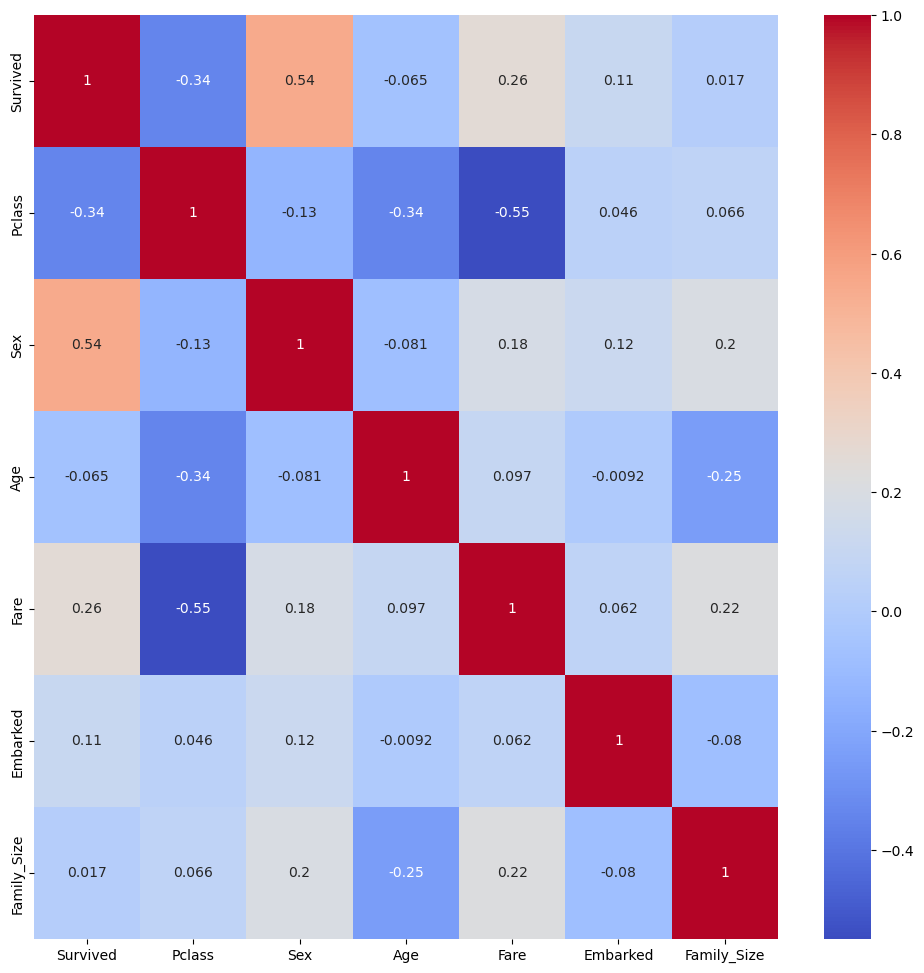

In [38]:
# generamos un mapa de calor (heatmap) que muestra las correlaciones entre las variables numéricas de mi dataframe df

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación entre las variables numéricas
corr = df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 12))

# Crear el mapa de calor con anotaciones y el esquema de colores 'coolwarm'
g = sns.heatmap(corr, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

In [40]:
# Eliminamos la variable 'Embarked' del DataFrame
df = df.drop('Embarked', axis=1)

# Mostramos el DataFrame actualizado
print(df.head())

   Survived  Pclass  Sex   Age     Fare  Family_Size
0         0       3    0  22.0   7.2500            1
1         1       1    1  38.0  71.2833            1
2         1       3    1  26.0   7.9250            0
3         1       1    1  35.0  53.1000            1
4         0       3    0  35.0   8.0500            0


Matriz de Confusión:
[[89 16]
 [23 51]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Precisión del modelo (Accuracy): 0.7821229050279329


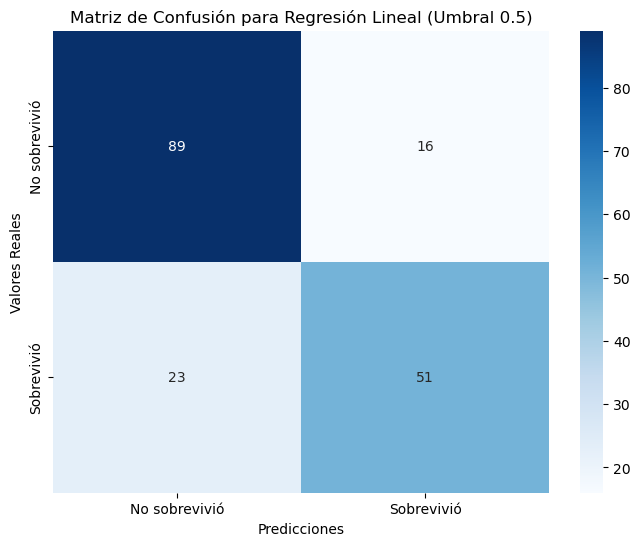

In [46]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Dividir datos en variables independientes (X) y dependiente (y)
X = df.drop(columns=['Survived'])  # Variables independientes
y = df['Survived']  # Variable dependiente

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_continuous = lr.predict(X_test)  # Predicciones continuas

# Convertir predicciones continuas a categóricas usando un umbral (0.5)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

# Calcular métricas de evaluación
cm = confusion_matrix(y_test, y_pred_binary)
cr = classification_report(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

# Mostrar resultados
print("Matriz de Confusión:")
print(cm)
print("\nReporte de Clasificación:")
print(cr)
print(f"Precisión del modelo (Accuracy): {accuracy}")

# Graficar la matriz de confusión
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title("Matriz de Confusión para Regresión Lineal (Umbral 0.5)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

### 1. Métricas Clave:
#### Matriz de Confusión:

##### 89 16
##### 23 51

##### Verdaderos Negativos (TN): 89 (El modelo predijo correctamente que no sobrevivieron).
##### Falsos Positivos (FP): 16 (El modelo predijo que sobrevivieron, pero no fue así).
##### Falsos Negativos (FN): 23 (El modelo predijo que no sobrevivieron, pero sí lo hicieron).
##### Verdaderos Positivos (TP): 51 (El modelo predijo correctamente que sobrevivieron).

#### Precisión del modelo (Accuracy): 0.7821 (78.21%)

##### Es el porcentaje de predicciones correctas sobre el total de datos.
##### Una precisión del 78.21% indica que el modelo es razonablemente bueno, aunque no perfecto.

### 2. Metricas por clase
#### Para la clase 0 (no sobrevivieron):
##### Precisión (Precision): 0.79 (79%)
###### De todas las veces que el modelo predijo que alguien no sobrevivió, acertó en el 79%.
#### Exhaustividad (Recall): 0.85 (85%)
###### El modelo identificó correctamente el 85% de todos los pasajeros que realmente no sobrevivieron.
#### F1-Score: 0.82
###### Promedio armónico de precisión y exhaustividad para balancearlas.

#### Para la clase 1 (sobrevivieron):
##### Precisión: 0.76 (76%)
###### De todas las veces que el modelo predijo que alguien sobrevivió, acertó en el 76%.
##### Exhaustividad: 0.69 (69%)
###### El modelo identificó correctamente el 69% de todos los pasajeros que realmente sobrevivieron.
##### F1-Score: 0.72
###### Equilibrio entre precisión y exhaustividad.

### 3. Interpretacion Glogal:
##### El modelo es más eficaz al predecir que alguien no sobrevivió (clase 0), ya que tiene una mejor exhaustividad y precisión para esta clase.
##### En cambio, la clase de los sobrevivientes (clase 1) tiene menor desempeño, con un recall del 69%, lo que significa que pierde algunos casos positivos (sobrevivientes).